In [7]:
import cv2 
import matplotlib.pyplot as plt
import skimage as ski

In [8]:
img = cv2.imread('chndr.jpg')
img.shape

(491, 1039, 3)

In [10]:
cv2.imshow('Image',img)
cv2.waitKey(0)

-1

In [11]:
#IMAGE TYPE CONVERSIONS
      # Color Image to Grayscale
      # to Binary

# GEOMETRIC TRANSFORMATION
      # Scaling
      # Rotation
      # Cropping 

# IMAGE ARTHEMATIC / BRIGHTNESS, CONTRAST ADJUSTMENTS
      # Addition
      # Subtraction
      # Multiplication
      # Division
      # Brightness & Contrast Adjustment
      # Filteration -> Blurring/Sharpening

# MORPHOLOGY
      # Structuring Elements
      # Opening
      # Closing
      # Erosion
      # Dialation
      #Removing Small Holes
      #Removing Small Objects
      #Region Properties

# FEATURE DETECTION
      # Feature Detection -> Extraction
      # Feature Matching

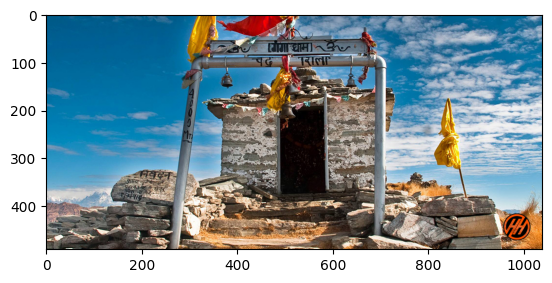

In [12]:
plt.imshow(img[:,:,::-1])

In [13]:
#Conversion to GrayScale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

# 0.6+R +0.3*G +0.1*B


(491, 1039)

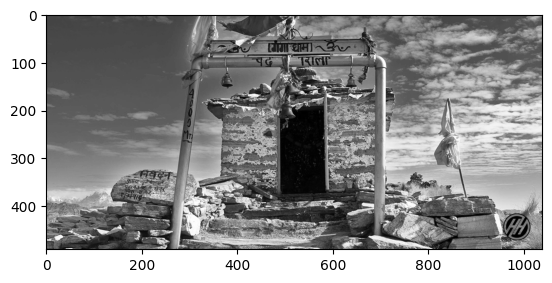

In [14]:
plt.imshow(img_gray, cmap ='gray')

In [15]:
#Conversion to Binary Image
# gray se b kr skta hu conversion or direct rgb se b. but gray se jyada meaningful hoga
th, img_bin = cv2.threshold(img_gray, 70,255, cv2.THRESH_BINARY)
img_bin.shape

(491, 1039)

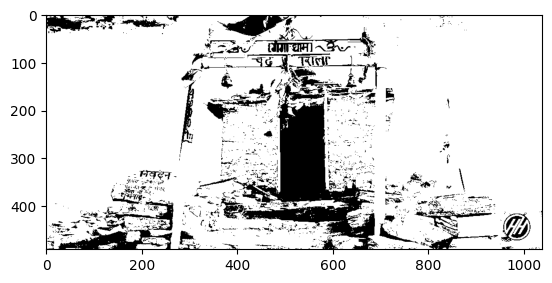

In [16]:
plt.imshow(img_bin , cmap ='gray')

(<matplotlib.image.AxesImage at 0x221461b05d0>,)

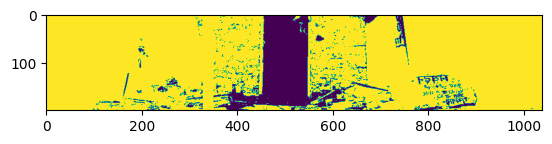

In [17]:
#Cropping
plt.imshow(img_bin[200:400,::-1]), #cmap = 'gray']

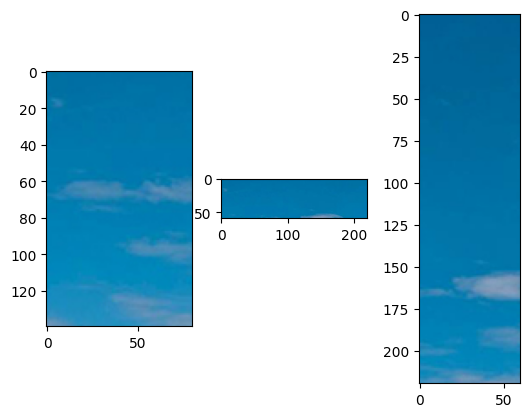

In [18]:
x,y,w,h = (50,150,80,140)
plt.subplot(1,3,1)                           # subplot to see al together
plt.imshow(img[y:y+h,x:x+w, ::-1])


x1,y1,x2,y2 = (50,150,270,210)
plt.subplot(1,3,2)
plt.imshow(img[y1:y2 ,x1:x2, ::-1])


y1,x1,y2,x2 = (50,150,270,210)
plt.subplot(1,3,3)
plt.imshow(img[y1:y2 ,x1:x2, ::-1])

In [19]:
# Scaling
img.shape

(491, 1039, 3)

In [20]:
img_large = cv2.resize(img, (1500,1500), interpolation = cv2.INTER_CUBIC)
img_large.shape

(1500, 1500, 3)

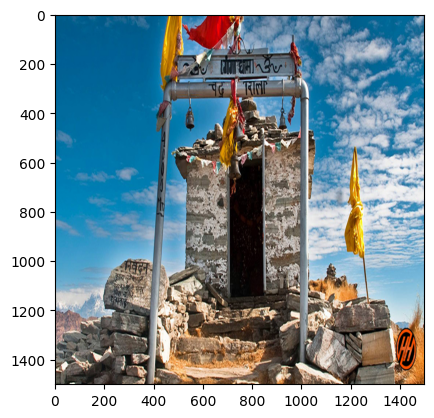

In [21]:
plt.imshow(img_large[:,:,::-1])

In [22]:
img_small = cv2.resize(
    img, (0,0),fx =0.25 , fy =0.25, interpolation = cv2.INTER_CUBIC)
img_small.shape

(123, 260, 3)

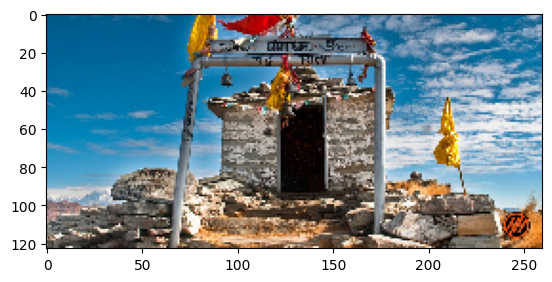

In [23]:
plt.imshow(img_small[:,:,::-1])

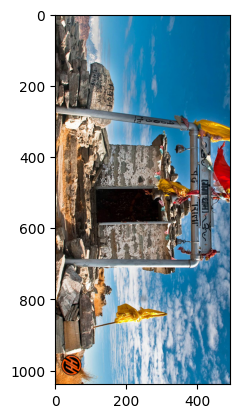

In [24]:
#Rotation

img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_90[:,:,::-1])

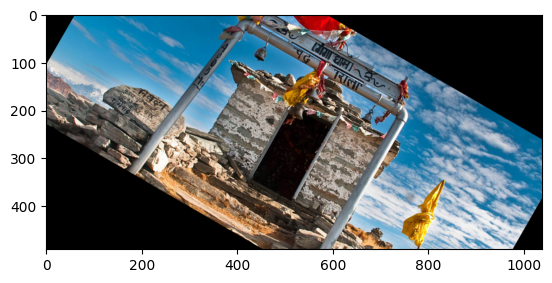

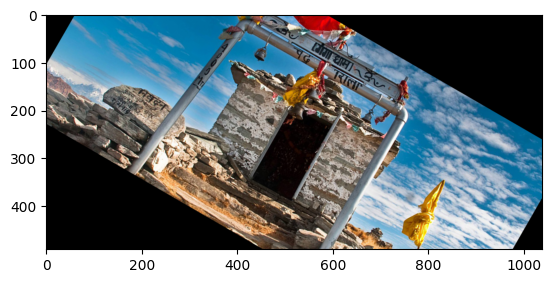

In [25]:
rot_mat = cv2.getRotationMatrix2D(
   center =(img.shape[1]//2,img.shape[0]//2) ,angle =-30,scale =1.0)
img_x = cv2.warpAffine(img, rot_mat, dsize = (img.shape[1], img.shape[0] ),
                       flags = cv2.INTER_LINEAR)
plt.imshow(img_x[:,:,::-1]);plt.show()

#approach that we will follow or easy

img_x = ski.transform.rotate(img, -30)
plt.imshow(img_x[:,:,::-1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1038.5, 490.5, -0.5)

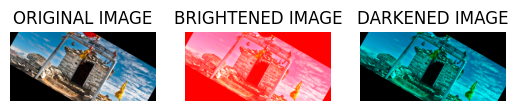

In [26]:
# PIXEL HAS INTESITY VALUES.

plt.subplot(1,3,1)
plt.title("ORIGINAL IMAGE")
plt.imshow(img_x[:,:,::-1]); plt.axis("off")

# Addition
plt.subplot(1,3,2)
plt.title("BRIGHTENED IMAGE")
plt.imshow(cv2.add(img_x[:,:,::-1],20));plt.axis("off")
#we can even have used the img instead where we written 20, we can give input as image too #blending.

#Subtraction
plt.subplot(1,3,3)
plt.title("DARKENED IMAGE")
plt.imshow(cv2.subtract(img_x[:,:,::-1],20 ));plt.axis("off")




In [27]:
# Datatype of image is " numpy array ".
# Datatype of image elements are " uint _8 bit ".

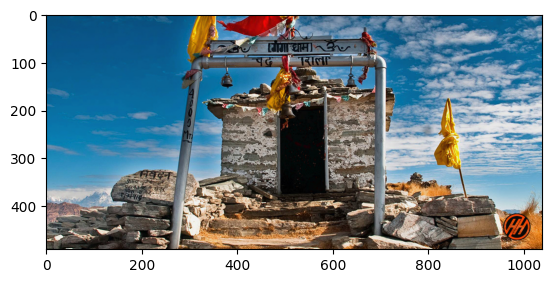

In [28]:
#CONTRAST
# alpha means contrast
# beta means brightness 
# we use alpha and beta to adjust contrast and brightness of image respectively.

img_cntbrt = cv2.convertScaleAbs(
    img, alpha = 1, beta =-10
)

plt.imshow(img_cntbrt[:,:,::-1])


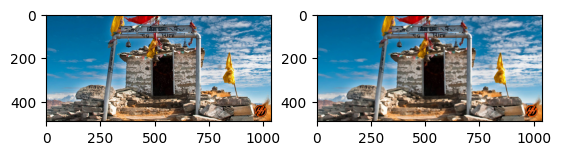

In [29]:
#Filtration

#Blur
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
img_blur = cv2.medianBlur(img, 5)
plt.imshow(img_blur[:,:,::-1])

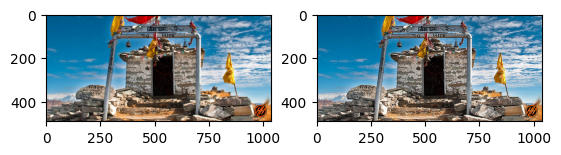

In [30]:
import numpy as np

#Sharp
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
shrp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
img_sharp = cv2.filter2D(img, -25,kernel =  shrp_kernel)
plt.imshow(img_sharp[:,:,::-1])
